In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
df_traffic_monthly=pd.read_csv("C:/Users/admin/Desktop/CS-Hackathon-international-air-traffic-from-and-to-india/Airlinewise.csv")

In [8]:
df_traffic_passengers = df_traffic_monthly[(df_traffic_monthly['PASSENGERS FROM INDIA'] > 0) | (df_traffic_monthly['PASSENGERS TO INDIA'] > 0)]

In [9]:
df_traffic_passengers_yearly = df_traffic_passengers.groupby(['AIRLINE NAME', 'YEAR'])['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'].sum().reset_index()

df_traffic_passengers_yearly['TOTAL TRAFFIC'] = df_traffic_passengers_yearly['PASSENGERS TO INDIA'] + df_traffic_passengers_yearly['PASSENGERS FROM INDIA']

In [10]:
df_traffic_2015 = df_traffic_passengers_yearly[df_traffic_passengers_yearly['YEAR'] == 2015]
df_traffic_2015_top10 = df_traffic_2015[df_traffic_2015['TOTAL TRAFFIC'].isin(df_traffic_2015['TOTAL TRAFFIC'].nlargest(10))]

df_traffic_2016 = df_traffic_passengers_yearly[df_traffic_passengers_yearly['YEAR'] == 2016]
df_traffic_2016_top10 = df_traffic_2016[df_traffic_2016['TOTAL TRAFFIC'].isin(df_traffic_2016['TOTAL TRAFFIC'].nlargest(10))]

df_traffic_2017 = df_traffic_passengers_yearly[df_traffic_passengers_yearly['YEAR'] == 2017]
df_traffic_2017_top10 = df_traffic_2017[df_traffic_2017['TOTAL TRAFFIC'].isin(df_traffic_2017['TOTAL TRAFFIC'].nlargest(10))]

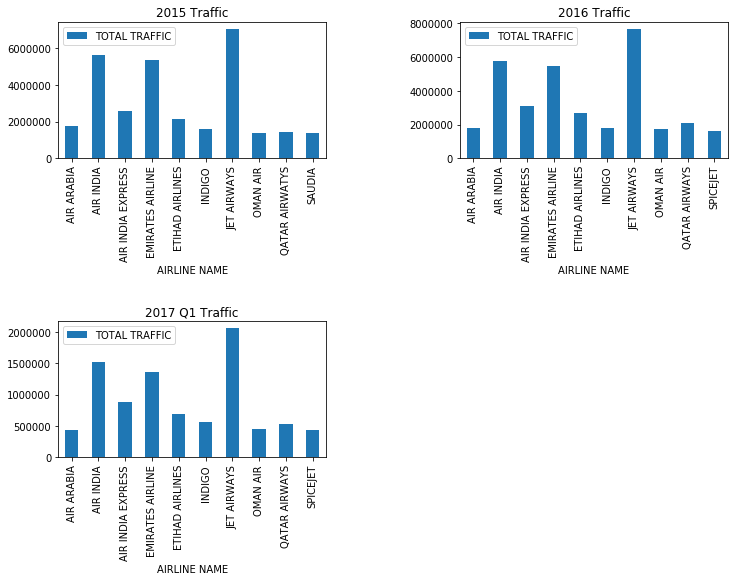

In [11]:
fig = plt.figure()
fig.subplots_adjust(hspace=1.2, wspace=.5)

ax = plt.subplot(221)

df_traffic_2015_top10.plot(ax=ax, x='AIRLINE NAME', y='TOTAL TRAFFIC', kind='bar', figsize=(12, 8), title='2015 Traffic')
ax = plt.subplot(222)
df_traffic_2016_top10.plot(ax=ax, x='AIRLINE NAME', y='TOTAL TRAFFIC', kind='bar', title='2016 Traffic')
ax = plt.subplot(223)
df_traffic_2017_top10.plot(ax=ax, x='AIRLINE NAME', y='TOTAL TRAFFIC', kind='bar', title='2017 Q1 Traffic')

In [12]:
#Passenger traffic monthwise and quarterwise

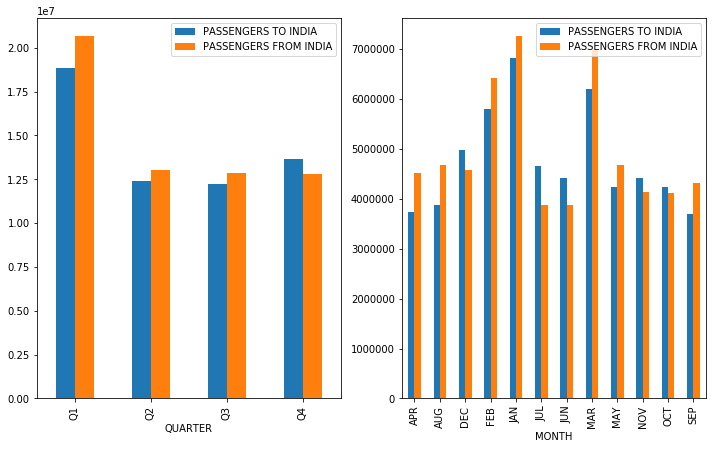

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df_qtrly = df_traffic_passengers.groupby(['QUARTER'])['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'].sum().reset_index()
df_qtrly.plot(x='QUARTER', y=['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'], kind='bar', ax=axes[0], figsize=(12, 7))

df_monthly = df_traffic_passengers.groupby(['MONTH'])['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'].sum().reset_index()
df_monthly.plot(x='MONTH', y=['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'], kind='bar', ax=axes[1], figsize=(12, 7))

In [14]:
#Citywise traffic

In [20]:
df_citywise=pd.read_csv("C:/Users/admin/Desktop/CS-Hackathon-international-air-traffic-from-and-to-india/Citypairwise.csv",error_bad_lines=False, warn_bad_lines=False)


In [21]:
df_citywise = df_citywise.iloc[:, :-3]

In [22]:
df_citywise['TOTAL TRAFFIC'] = df_citywise['PASSENGERS FROM CITY1 TO CITY2'] + df_citywise['PASSENGERS FROM CITY2 TO CITY1']
df_citywise.head(10)

,YEAR,QUARTER,CITY1,CITY2,PASSENGERS FROM CITY1 TO CITY2,PASSENGERS FROM CITY2 TO CITY1,TOTAL TRAFFIC
0,2015,Q1,ABUDHABI,AHMEDABAD,12764,15358,28122
1,2015,Q1,ABUDHABI,BENGALURU,27341,35988,63329
2,2015,Q1,ABUDHABI,CHENNAI,31756,32593,64349
3,2015,Q1,ABUDHABI,DELHI,66416,65956,132372
4,2015,Q1,ABUDHABI,GOA,8408,12593,21001
5,2015,Q1,ABUDHABI,HYDERABAD,37265,44645,81910
6,2015,Q1,ABUDHABI,JAIPUR,9437,10859,20296
7,2015,Q1,ABUDHABI,KOCHI,34055,41972,76027
8,2015,Q1,ABUDHABI,KOLKATA,1580,1799,3379
9,2015,Q1,ABUDHABI,KOZHIKODE,31618,41032,72650


In [23]:
df_citywise_top100 = df_citywise[df_citywise['TOTAL TRAFFIC'].isin(df_citywise['TOTAL TRAFFIC'].nlargest(100))]
df_citywise_top100.head(20)

,YEAR,QUARTER,CITY1,CITY2,PASSENGERS FROM CITY1 TO CITY2,PASSENGERS FROM CITY2 TO CITY1,TOTAL TRAFFIC
42,2015,Q1,BANGKOK,MUMBAI,90096,94099,184195
93,2015,Q1,DUBAI,CHENNAI,102190,118103,220293
94,2015,Q1,DUBAI,DELHI,218394,218530,436924
96,2015,Q1,DUBAI,HYDERABAD,99989,112952,212941
98,2015,Q1,DUBAI,KOCHI,99921,114833,214754
104,2015,Q1,DUBAI,MUMBAI,260038,300106,560144
141,2015,Q1,KATHMANDU,DELHI,91764,86994,178758
172,2015,Q1,LONDON,DELHI,122349,122506,244855
174,2015,Q1,LONDON,MUMBAI,83375,94554,177929
266,2015,Q1,SINGAPORE,CHENNAI,88291,100794,189085


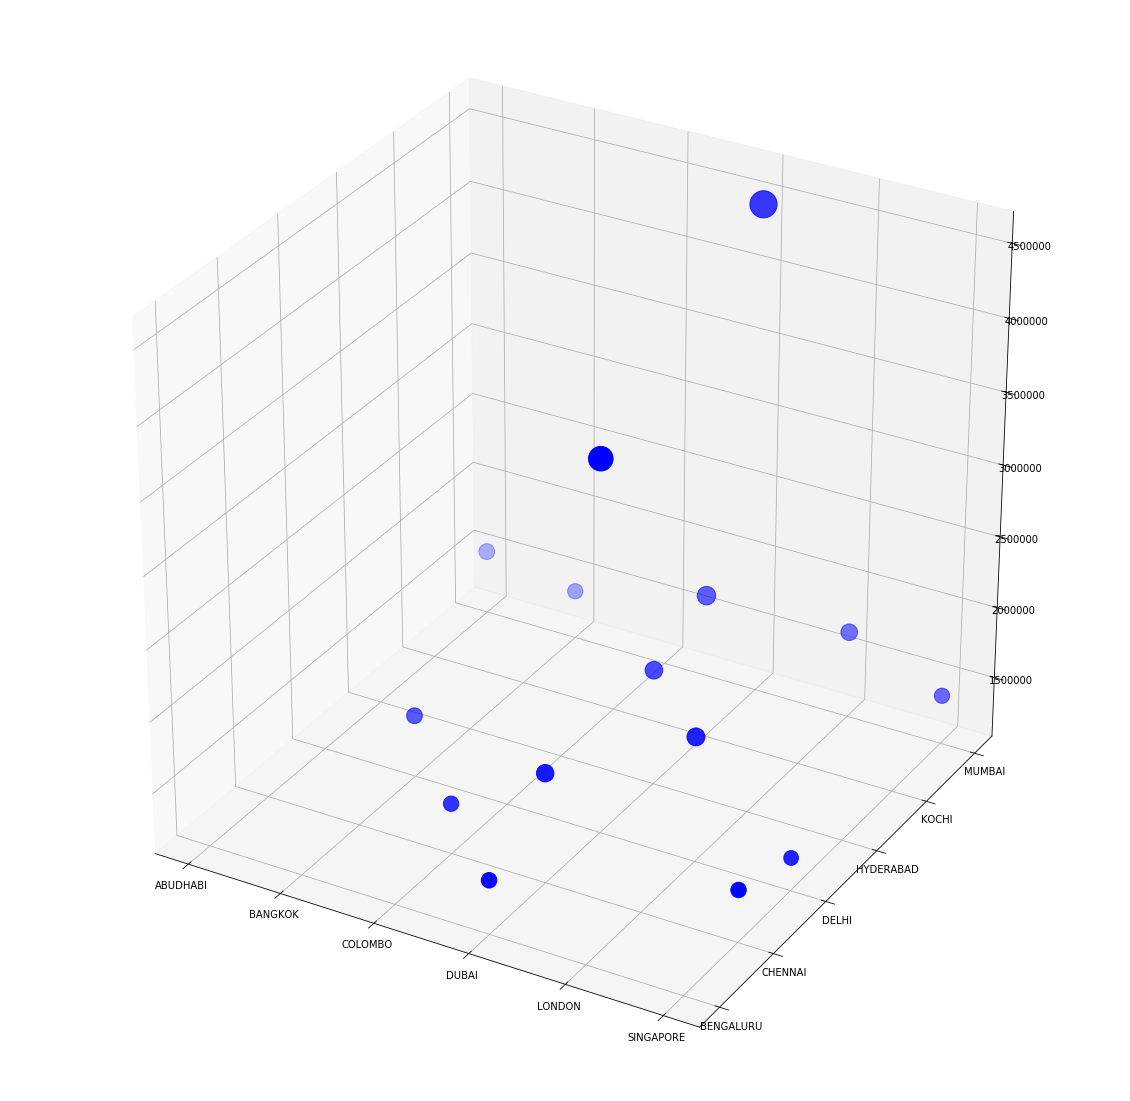

,CITY1,CITY2,TOTAL TRAFFIC,TOTAL TRAFFIC SCALED
0,DUBAI,MUMBAI,4480329,739.172089
1,DUBAI,DELHI,3659375,603.729740
2,DUBAI,KOCHI,2085457,344.062145
3,LONDON,DELHI,1953307,322.259820
4,DUBAI,HYDERABAD,1886814,311.289695
5,DUBAI,CHENNAI,1846427,304.626581
6,LONDON,MUMBAI,1686086,278.173257
7,ABUDHABI,MUMBAI,1524384,251.495394
8,BANGKOK,DELHI,1511137,249.309882
9,DUBAI,BENGALURU,1455623,240.151090


In [24]:
df_citywise_cumulative_traffic = df_citywise.groupby(['CITY1', 'CITY2'])['TOTAL TRAFFIC'].sum().nlargest(15).reset_index()
highest_traffic = np.max(df_citywise['TOTAL TRAFFIC'])
uniqueCity1, city1Ints = np.unique(df_citywise_cumulative_traffic['CITY1'], return_inverse=True)
uniqueCity2, city2Ints = np.unique(df_citywise_cumulative_traffic['CITY2'], return_inverse=True)


df_citywise_cumulative_traffic['TOTAL TRAFFIC SCALED'] = (df_citywise_cumulative_traffic['TOTAL TRAFFIC'] / highest_traffic) * 100


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(city1Ints, city2Ints, df_citywise_cumulative_traffic['TOTAL TRAFFIC'], s=df_citywise_cumulative_traffic['TOTAL TRAFFIC SCALED'], c='b')
ax.set(xticks=range(len(uniqueCity1)), xticklabels=uniqueCity1,
       yticks=range(len(uniqueCity2)), yticklabels=uniqueCity2) 
plt.show()

df_citywise_cumulative_traffic.head(10)